<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature detection
Source: https://blog.francium.tech/feature-detection-and-matching-with-opencv-5fd2394a590<br>
Mathematical representations of key areas in an image are the features. Features are the vector representations of the visual content from an image so that we can perform mathematical operations on them. Features from an image plays an important role in computer vision for variety of applications including object detection, motion estimation, segmentation, image alignment and a lot more. Features may include edges, corners or parts of an image. List of feature detection techniques:<br>
Haris corner detection<br>
Shi-Tomasi corner detection<br>
SIFT (Scale-Invariant Feature Transform)<br>
SURF (Speeded-Up Robust Features)<br>
FAST algorithm for corner detection<br>
ORB (Oriented FAST and Rotated Brief)


In [1]:
!pip -q install opencv-python==3.4.9.31
!pip -q install opencv-contrib-python==3.4.9.31

import cv2
cv2.__version__

'3.4.9'

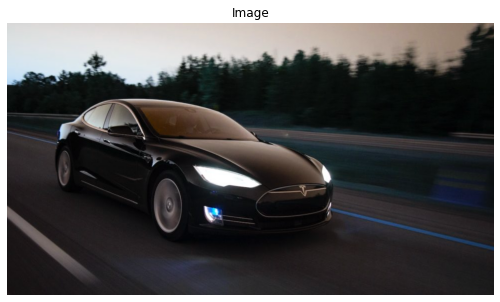

In [2]:
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

url = 'https://www.marketone.ca/wp-content/uploads/2019/02/jp-valery-Qm_n6aoYzDs-unsplash-975x545.jpg'
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(img)
plt.axis('off')
ax.set_title('Image');

Haris corner detection

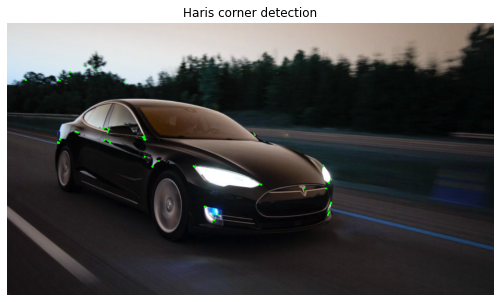

In [33]:
url = 'https://www.marketone.ca/wp-content/uploads/2019/02/jp-valery-Qm_n6aoYzDs-unsplash-975x545.jpg'
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)
dst = cv2.cornerHarris(gray_img, blockSize=2, ksize=3, k=0.04)

# dilate to mark the corners
dst = cv2.dilate(dst, None)
img[dst > 0.04 * dst.max()] = [0, 255, 0]

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(img)
plt.axis('off')
ax.set_title('Haris corner detection');

Shi-Tomasi corner detection<br>
Shi and Tomasi came up with a different scoring function than the one used in Haris corner detector to find N strongest corners from an image.

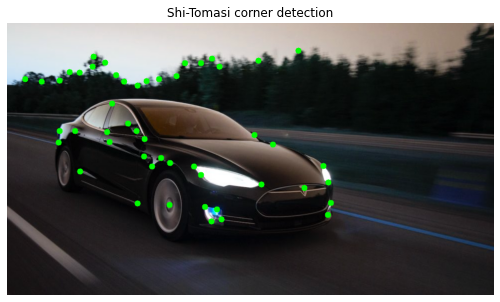

In [42]:
url = 'https://www.marketone.ca/wp-content/uploads/2019/02/jp-valery-Qm_n6aoYzDs-unsplash-975x545.jpg'
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray_img, maxCorners=50, qualityLevel=0.04, minDistance=20)
corners = np.float32(corners)

for item in corners:
    x, y = item[0]
    cv2.circle(img, (int(x), int(y)), 6, (0, 255, 0), -1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(img)
plt.axis('off')
ax.set_title('Shi-Tomasi corner detection');

SIFT (Scale-Invariant Feature Transform)<br>
SIFT is both rotation as well as scale invariant. SIFT provides key points and keypoint descriptors where keypoint descriptor describes the keypoint at a selected scale and rotation with image gradients.

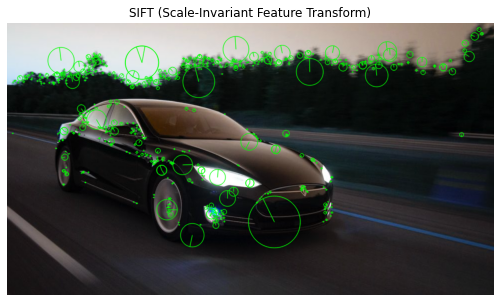

In [40]:
url = 'https://www.marketone.ca/wp-content/uploads/2019/02/jp-valery-Qm_n6aoYzDs-unsplash-975x545.jpg'
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray_img, None)
kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(kp_img)
plt.axis('off')
ax.set_title('SIFT (Scale-Invariant Feature Transform)');

Above image has circles depicting the key points/features, where size of the circle represents the strength of the key point and the line inside the circle denotes the orientation of the key point.

SURF (Speeded-Up Robust Features)<br>
Even though SIFT works well it performs intensive operations which are time consuming. SURF was introduced to have all the advantages of SIFT with reduced processing time.

In [3]:
import cv2
url = 'https://www.marketone.ca/wp-content/uploads/2019/02/jp-valery-Qm_n6aoYzDs-unsplash-975x545.jpg'
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
surf = cv2.xfeatures2d.SURF_create()
kp, des = surf.detectAndCompute(gray_img, None)
kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(kp_img)
plt.axis('off')
ax.set_title('SURF (Speeded-Up Robust Features)');

error: ignored

Building opencv with "OPENCV_ENABLE_NONFREE=ON"

In [1]:
!wget -O opencv.zip https://github.com/opencv/opencv/archive/4.0.0.zip
!wget -O opencv_contrib.zip https://github.com/opencv/opencv_contrib/archive/4.0.0.zip

!unzip -q opencv.zip
!unzip -q opencv_contrib.zip

!mv opencv-4.0.0 opencv
!mv opencv_contrib-4.0.0 opencv_contrib

!cp -rf opencv_contrib /root
%cd opencv
!mkdir build
%cd build

--2023-02-14 19:20:26--  https://github.com/opencv/opencv/archive/4.0.0.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/opencv/opencv/zip/refs/tags/4.0.0 [following]
--2023-02-14 19:20:26--  https://codeload.github.com/opencv/opencv/zip/refs/tags/4.0.0
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91053596 (87M) [application/zip]
Saving to: ‘opencv.zip’

opencv.zip          100%[===================>]  86.83M  17.7MB/s    in 4.9s    

2023-02-14 19:20:32 (17.6 MB/s) - ‘opencv.zip’ saved [91053596/91053596]

--2023-02-14 19:20:32--  https://github.com/opencv/opencv_contrib/archive/4.0.0.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to g

In [2]:
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
	-D CMAKE_INSTALL_PREFIX=/usr/local \
	-D INSTALL_PYTHON_EXAMPLES=ON \
	-D INSTALL_C_EXAMPLES=OFF \
	-D OPENCV_ENABLE_NONFREE=ON \
	-D OPENCV_EXTRA_MODULES_PATH=~/opencv_contrib/modules \
	-D PYTHON_EXECUTABLE=~/.virtualenvs/cv/bin/python \
	-D BUILD_EXAMPLES=ON ..

-- The CXX compiler identification is GNU 9.4.0
-- The C compiler identification is GNU 9.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Found PythonInterp: /root/.virtualenvs/cv/bin/python (Required is at least version "2.7") 
CMake Warning at cmake/OpenCVDetectPython.cmake:81 (message):
  CMake's 'find_host_package(PythonInterp 2.7)' founds wrong Python version:

  PYTHON_EXECUTABLE=/root/.virtualenvs/cv/bin/python

  PYTHON_VERSION_STRING=

  Consider specify 'PYTHON2_EXECUTABLE' variable via CMake command line or
  environment variables

Call Stack (most recent call first):
  cmake/OpenCVDetectPython.cmake:275 (find_pyt

In [ ]:
!make -j16

[  0%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_core.c.o
[  0%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image.c.o
[  0%] Building C object 3rdparty/libjasper/CMakeFiles/libjasper.dir/jas_cm.c.o
[  0%] Building C object 3rdparty/libjasper/CMakeFiles/libjasper.dir/jas_debug.c.o
[  0%] Building C object 3rdparty/quirc/CMakeFiles/quirc.dir/src/decode.c.o
[  0%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image_color_convert_rgbs.c.o
[  0%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image_color_convert_all.c.o
[  0%] Building C object 3rdparty/quirc/CMakeFiles/quirc.dir/src/quirc.c.o
[  0%] Building C object 3rdparty/libjasper/CMakeFiles/libjasper.dir/jas_icc.c.o
[  0%] Building C object 3rdparty/libjasper/CMakeFiles/libjasper.dir/jas_getopt.c.o
[  0%] Building C object 3rdparty/quirc/CMakeFiles/quirc.dir/src/version_db.c.o
cc1: warning: ‘-Werror=’ argument ‘-Werror=non-virtual-dtor’ is not valid for C
[  0%] Buildi

In [ ]:
!sudo make install
!sudo ldconfig

FAST algorithm for corner detection<br>
SURF is fast when compared to SIFT but not as fast to use it with real time devices like mobile phones. So FAST algorithm was introduced with reduced processing time. However FAST gives us only the key points and we may need to compute descriptors with other algorithms like SIFT and SURF.

In [ ]:
import cv2
url = 'https://www.marketone.ca/wp-content/uploads/2019/02/jp-valery-Qm_n6aoYzDs-unsplash-975x545.jpg'
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fast = cv2.FastFeatureDetector_create()
fast.setNonmaxSuppression(False)

kp = fast.detect(gray_img, None)
kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0))

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(kp_img)
plt.axis('off')
ax.set_title('FAST');

ORB<br>
ORB is an efficient open source alternative to SIFT and SURF. Even though it computes less key points when compared to SIFT and SURF yet they are effective. It uses FAST and BRIEF techniques to detect the key points and compute the image descriptors respectively.

In [ ]:
import cv2
url = 'https://www.marketone.ca/wp-content/uploads/2019/02/jp-valery-Qm_n6aoYzDs-unsplash-975x545.jpg'
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(nfeatures=2000)
kp, des = orb.detectAndCompute(gray_img, None)
kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(kp_img)
plt.axis('off')
ax.set_title('ORB');

#Feature matching
Feature matching refers to finding corresponding features from two similar images based on a search distance algorithm. One of the images is considered the source and the other as target, and the feature matching technique is used to either find or derive and transfer attributes from source to target image.

Brute-Force (BF) Matcher

In [4]:
import cv2

url1 = 'https://miro.medium.com/v2/resize:fit:526/format:webp/1*pah6Xg1Gr3ayaGhliQvrcw.jpeg'
req = urllib.request.Request(url1, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img1 = cv2.imdecode(arr, -1) # 'Load it as it is'

url2 = 'https://miro.medium.com/v2/resize:fit:526/format:webp/1*pah6Xg1Gr3ayaGhliQvrcw.jpeg'
req = urllib.request.Request(url2, headers={'User-Agent' : "Magic Browser"}) 
req = urllib.request.urlopen( req )
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img2 = cv2.imdecode(arr, -1) # 'Load it as it is'

# img1 = cv2.imread('book_cover.jpg', 0)
# img2 = cv2.imread('book_cover_rotated.jpg', 0)


orb = cv2.ORB_create(nfeatures=500)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
# draw first 50 matches
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(match_img)
plt.axis('off')
ax.set_title('Brute-Force (BF) Matcher');

/content/build


FLANN based matcher<br>
Fast Library for Approximate Nearest Neighbors (FLANN) is optimised to find the matches with search even with large datasets hence its fast when compared to Brute-Force matcher.

With ORB and FLANN matcher let us extract the tesla book cover from the second image and correct the rotation with respect to the first image

In [ ]:
import argparse

import cv2
import numpy as np


def get_corrected_img(img1, img2):
    MIN_MATCHES = 50

    orb = cv2.ORB_create(nfeatures=500)
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    index_params = dict(algorithm=6,
                        table_number=6,
                        key_size=12,
                        multi_probe_level=2)
    search_params = {}
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # As per Lowe's ratio test to filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    if len(good_matches) > MIN_MATCHES:
        src_points = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_points = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        m, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)
        corrected_img = cv2.warpPerspective(img1, m, (img2.shape[1], img2.shape[0]))

        return corrected_img
    return img2


if __name__ == "__main__":
    parser = argparse.ArgumentParser(add_help=False)
    parser.add_argument("--src", default='book_cover.jpg', help="path for the object image")
    parser.add_argument("--dest", default='book_cover_rotated.jpg', help="path for image containing the object")
    args = parser.parse_args([])

    url1 = 'https://miro.medium.com/v2/resize:fit:526/format:webp/1*pah6Xg1Gr3ayaGhliQvrcw.jpeg'
    req = urllib.request.Request(url1, headers={'User-Agent' : "Magic Browser"}) 
    req = urllib.request.urlopen( req )
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img1 = cv2.imdecode(arr, -1) # 'Load it as it is'

    url2 = 'https://miro.medium.com/v2/resize:fit:526/format:webp/1*pah6Xg1Gr3ayaGhliQvrcw.jpeg'
    req = urllib.request.Request(url2, headers={'User-Agent' : "Magic Browser"}) 
    req = urllib.request.urlopen( req )
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img2 = cv2.imdecode(arr, -1) # 'Load it as it is'

    img = get_corrected_img(im2, im1)
    cv2.imshow('Corrected image', img)
    cv2.waitKey()